In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [5]:
df = pd.read_csv("./smoking.csv")

In [6]:
# get rid of ID column
df = df.drop("ID", axis = 1)
df.head(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [22]:
# NULL VALUES

df.isnull().sum().sum()

## there are no null values in our dataset at all!

0

## EDA - Cols 0-6

#### Visual Representation of Categorical Variables

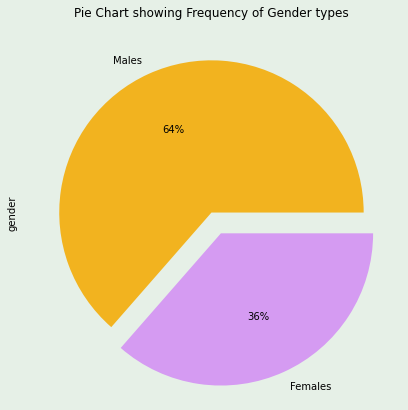

In [9]:
colors = ("#f2b31f", "#d59bf2")
explode = (0.0, 0.15)
labels = ["Males", "Females"]
#fig, axes = plt.subplots(1, 2, figsize = (11, 7))
#axes = axes.flatten()

# sns.barplot(x = df["gender"].value_counts().index,
#             y = df["gender"].value_counts(),
#             data = df, palette = "Spectral", saturation = 2).set(title = "Barplot showing Frequency of Gender types")

plt.figure(figsize = [7, 7], clear = False , facecolor = '#e6f0e7')
df["gender"].value_counts().plot.pie(colors=colors, labels=labels, 
                                    explode=explode, autopct = '%1.0f%%').set_title("Pie Chart showing Frequency of Gender types");


From this plot, we see the distribution of the entire data set categorized by genders.

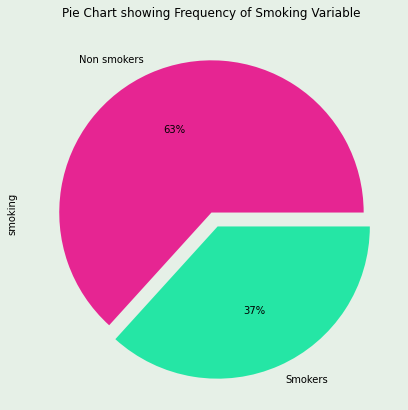

In [10]:
explode = (0, 0.1)
colors = ["#e62592", "#25e6a5"]
labels =['Non smokers','Smokers']
# sns.barplot(x=df['smoking'].value_counts().index,
#            y = df['smoking'].value_counts(),
#            data = df, palette = 'husl', saturation = 5).set(title = "Barplot showing Frequency of Smoking Variable")
# plt.show()


plt.figure(figsize = [7, 7], clear = False , facecolor = '#e6f0e7')
df["smoking"].value_counts().plot.pie(explode=explode, labels=labels, colors=colors, autopct = '%1.0f%%').set_title("Pie Chart showing Frequency of Smoking Variable");


This plot shows us the dataset grouped into Smokers and Non-Smokers. 

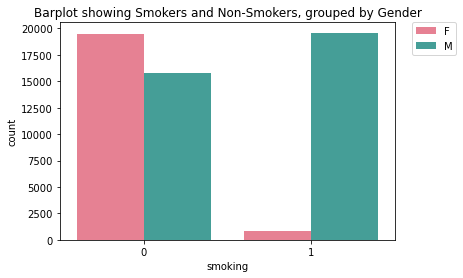

In [11]:
sns.countplot(data=df,x='smoking',hue='gender', palette = "husl").set(title = "Barplot showing Smokers and Non-Smokers, grouped by Gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From the plot above, we can see that men make up the majority of the smokers group, by far. The non-smoking group comprises of mostly women!

#### Visual Representation of Numerical Variables

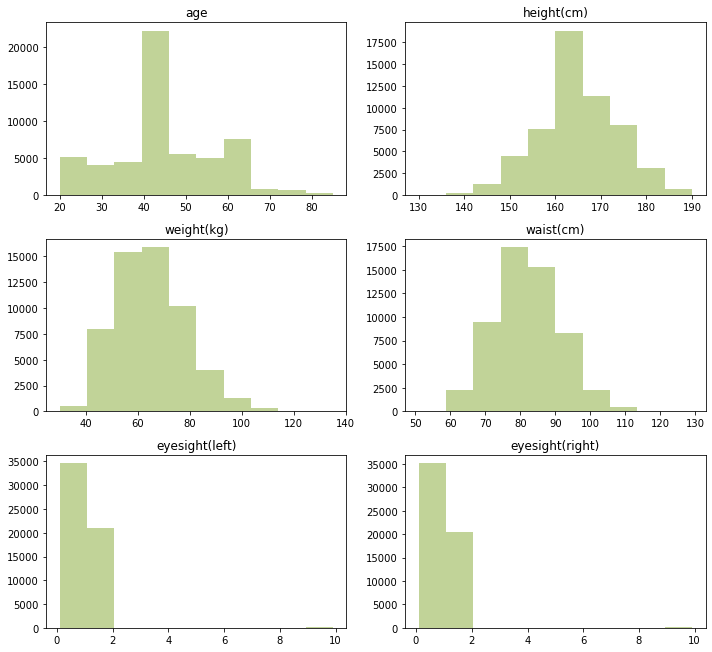

In [12]:
#Plot histograms for 

num_list = list(df.columns[1:7])

fig = plt.figure(figsize=(10,45))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(df[num_list[i]],color='#85a832',alpha=0.5)

plt.tight_layout()

In [13]:
numerical = df.columns[1:7]
numerical

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)'],
      dtype='object')

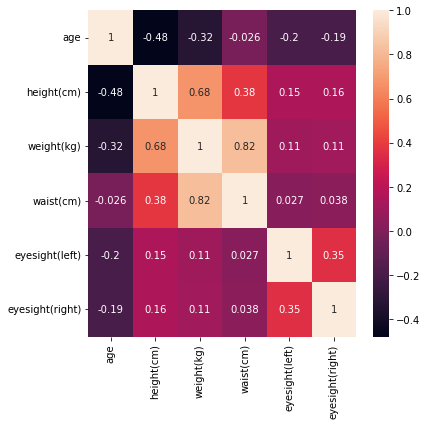

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize= (6,6))
sns.heatmap(df[numerical].corr(), annot=True)
plt.show()
plt.clf()

#### Some group by plots

##### Age Distribution grouped by Gender and Smoking

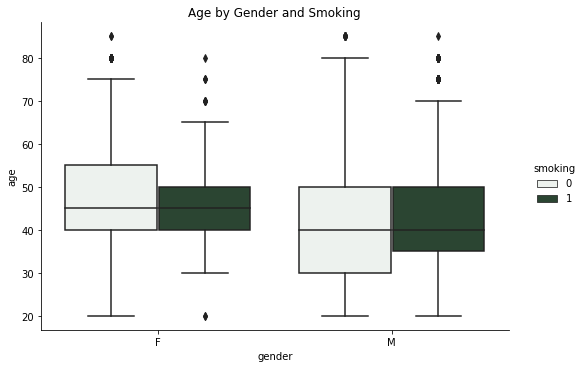

In [29]:
sns.catplot(x = "gender",
            y = "age",
            kind = "box",
            hue = "smoking",
            color = '#2b4532',
            data = df, saturation = 4, height = 5, aspect = 1.5,
            margin_titles = True).set(title = "Age by Gender and Smoking");

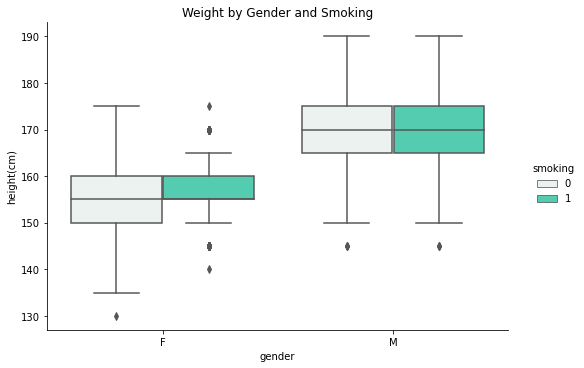

In [28]:
sns.catplot(x = "gender",
            y = "height(cm)",
            kind = "box",
            hue = "smoking",
            color = '#54ccb0',
            data = df, saturation = 4, height = 5, aspect = 1.5,
            margin_titles = True).set(title = "Height (cm) by Gender and Smoking");

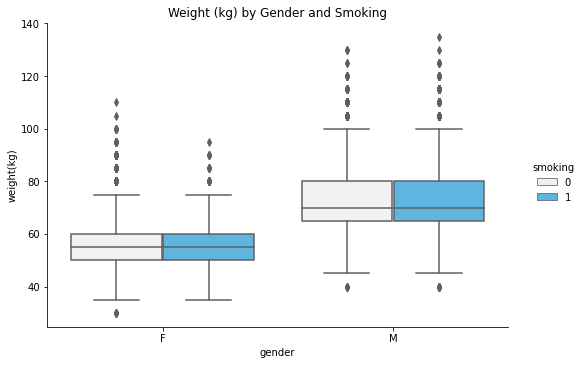

In [30]:
sns.catplot(x = "gender",
            y = "weight(kg)",
            kind = "box",
            hue = "smoking",
            color = '#5eb5e0',
            data = df, saturation = 4, height = 5, aspect = 1.5,
            margin_titles = True).set(title = "Weight (kg) by Gender and Smoking");

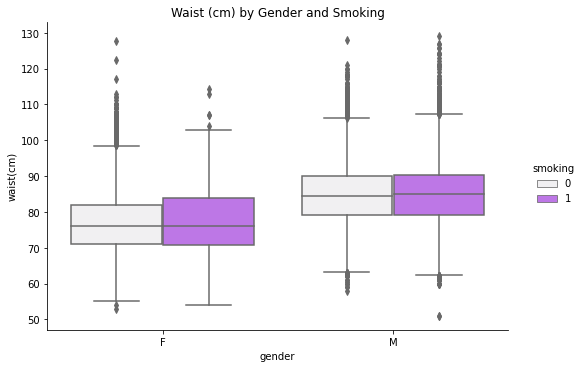

In [31]:
sns.catplot(x = "gender",
            y = "waist(cm)",
            kind = "box",
            hue = "smoking",
            color = '#bd77e6',
            data = df, saturation = 4, height = 5, aspect = 1.5,
            margin_titles = True).set(title = "Waist (cm) by Gender and Smoking");

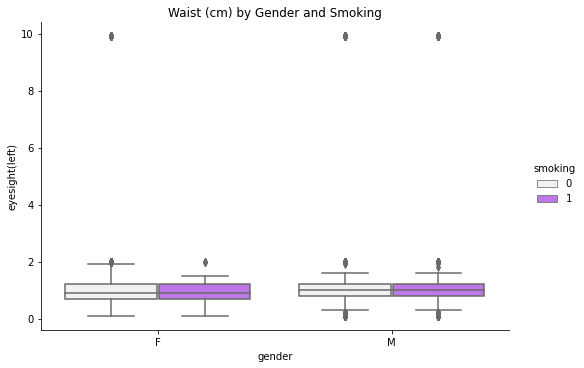

In [32]:
sns.catplot(x = "gender",
            y = "eyesight(left)",
            kind = "box",
            hue = "smoking",
            color = '#bd77e6',
            data = df, saturation = 4, height = 5, aspect = 1.5,
            margin_titles = True).set(title = "Waist (cm) by Gender and Smoking");

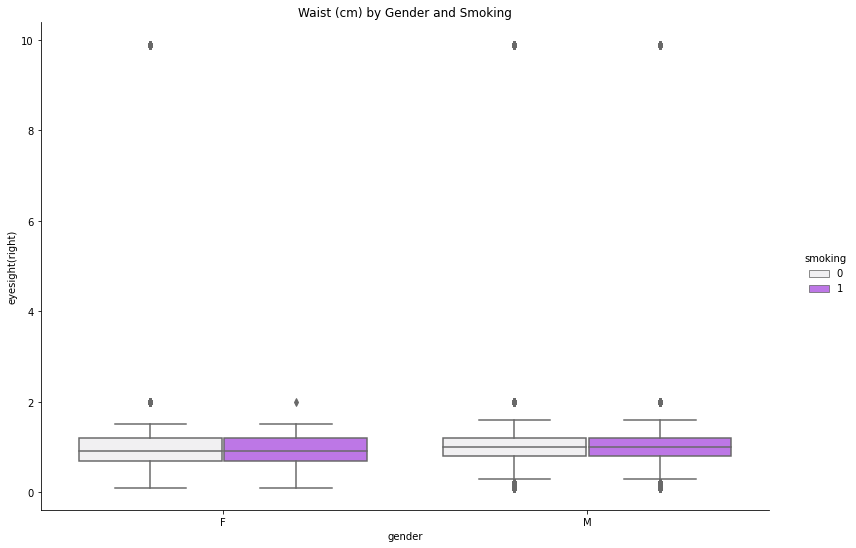

In [36]:
sns.catplot(x = "gender",
            y = "eyesight(right)",
            kind = "box",
            hue = "smoking",
            color = '#bd77e6',
            data = df, saturation = 4, height = 7.5, aspect = 1.5,
            margin_titles = True).set(title = "Waist (cm) by Gender and Smoking");